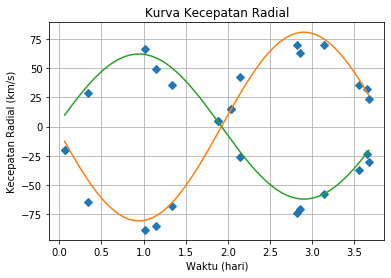

A1 (km/s) = 80.57142739181137
A2 (km/s) = 61.95989413204544
omega (rad/hari) = 1.601396568858022
T (hari) = 3.92356611058572
phi = 0.05996430343500618
phi (derajat) = 3.4357015082676794


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

file = "DataKecepatanRadialBintangGanda.txt"

######### Kredit kode fitting fungsi dari:
# https://stats.stackexchange.com/questions/348765/simultaneously-curve-fitting-for-2-models-with-shared-parameters-in-r
#########

y1 = np.loadtxt(file, usecols=1)
y2 = np.loadtxt(file, usecols=2)
comboY = np.append(y1, y2)

t = np.loadtxt(file, usecols=0)
comboX = np.append(t, t)

def mod1(data, Amplitude, omega, phi): # not all parameters are used here
        return Amplitude * np.sin(omega*data+phi)

def mod2(data, Amplitude, omega, phi): # not all parameters are used here
        return -1*Amplitude * np.sin(omega*data+phi)

def comboFunc(comboData, A1, A2, omega, phi):
    # single data set passed in, extract separate data
    extract1 = comboData[:len(y1)] # first data
    extract2 = comboData[len(y2):] # second data

    result1 = mod1(extract1, A1, omega, phi)
    result2 = mod2(extract2, A2, omega, phi)

    return np.append(result1, result2)


# some initial parameter values
initialParameters = np.array([60, 80 , 1.8, 0])

# curve fit the combined data to the combined function
fittedParameters, pcov = curve_fit(comboFunc, comboX, comboY, initialParameters)

# values for display of fitted function
A1, A2, omega, phi = fittedParameters

tmod = np.linspace(t[0], t[-1], 1000)

y_fit_1 = mod1(tmod, A1, omega, phi) # first data set, first equation
y_fit_2 = mod2(tmod, A2, omega, phi) # second data set, second equation

plt.plot(comboX, comboY, 'D') # plot the raw data
plt.plot(tmod, y_fit_1) # plot the equation using the fitted parameters
plt.plot(tmod, y_fit_2) # plot the equation using the fitted parameters
plt.xlabel("Waktu (hari)")
plt.ylabel("Kecepatan Radial (km/s)")
plt.grid()
plt.title("Kurva Kecepatan Radial")
plt.show()

print("A1 (km/s) =", abs(fittedParameters[0]))
print("A2 (km/s) =", abs(fittedParameters[1]))
print("omega (rad/hari) =", fittedParameters[2])
print("T (hari) =", 2*np.pi/fittedParameters[2])
print("phi =", fittedParameters[3])
print("phi (derajat) =", fittedParameters[3]*180/np.pi)